<a href="https://colab.research.google.com/github/gabrielxbox/projeto-com-python/blob/master/DANDO_SIGNIFICADO_AS_COISAS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import svd
import pandas as pd
import math

In [ ]:
# Gera uma amostra de posto k
def gen_rank_k(k, U, W, Vt):
    # cria uma aproximação da matriz U
    uk = U[:,:k]
   
    # Cria uma aproximação da matriz V
    vt = Vt[:k, :]
   
    # Insere os k primeiros elementos de W na diagonal de uma matriz
    wk = np.diag(W[:k])
   
    # multiplica uk e wk
    temp = np.matmul(uk, wk)
   
    # multiplica o resultado por vt
    return np.matmul(temp, vt)

def gen_ranked_k(k, U, W, Vt):
    return U[:,:k], np.diag(W[:k]), Vt[:k, :]

In [ ]:
L = plt.imread('/content/corcovado.png')

In [ ]:
L.shape

(784, 960, 4)

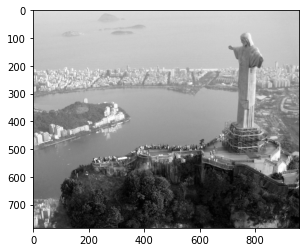

In [ ]:
plt.imshow(L, cmap="gray")

In [ ]:
print(L)

[[[0.87058824 0.87058824 0.87058824 1.        ]
  [0.8745098  0.8745098  0.8745098  1.        ]
  [0.8745098  0.8745098  0.8745098  1.        ]
  ...
  [0.79607844 0.79607844 0.79607844 1.        ]
  [0.7921569  0.7921569  0.7921569  1.        ]
  [0.78039217 0.78039217 0.78039217 1.        ]]

 [[0.8627451  0.8627451  0.8627451  1.        ]
  [0.87058824 0.87058824 0.87058824 1.        ]
  [0.8745098  0.8745098  0.8745098  1.        ]
  ...
  [0.8039216  0.8039216  0.8039216  1.        ]
  [0.8        0.8        0.8        1.        ]
  [0.7921569  0.7921569  0.7921569  1.        ]]

 [[0.8666667  0.8666667  0.8666667  1.        ]
  [0.8745098  0.8745098  0.8745098  1.        ]
  [0.8745098  0.8745098  0.8745098  1.        ]
  ...
  [0.8        0.8        0.8        1.        ]
  [0.8        0.8        0.8        1.        ]
  [0.7921569  0.7921569  0.7921569  1.        ]]

 ...

 [[0.48235294 0.48235294 0.48235294 1.        ]
  [0.4862745  0.4862745  0.4862745  1.        ]
  [0.50196

In [ ]:
lU, lW, lVt = svd(L, full_matrices=True)

In [ ]:
lU

array([[[-3.26925367e-02, -2.50659287e-02,  9.97326374e-01, ...,
         -1.52748180e-04,  1.49133499e-03, -1.22435205e-03],
        [-3.27942371e-02, -3.12341228e-02,  3.99030891e-04, ...,
         -3.28273672e-05, -1.18319651e-04,  2.30852296e-04],
        [-3.27942371e-02, -3.12341228e-02,  4.46355640e-04, ...,
         -3.02983671e-02, -3.16344127e-02, -2.90598292e-02],
        ...,
        [-3.07602081e-02,  9.21297595e-02,  1.70990673e-03, ...,
          9.90629673e-01, -9.92850121e-03, -1.16021549e-02],
        [-3.06585059e-02,  9.82979536e-02,  2.42806491e-04, ...,
         -9.97219887e-03,  9.89430189e-01, -1.23504866e-02],
        [-3.03534009e-02,  1.16802536e-01,  3.49290203e-03, ...,
         -1.15760863e-02, -1.22818472e-02,  9.85596120e-01]],

       [[-3.25108133e-02, -1.41950194e-02,  9.95354474e-01, ...,
          1.94816990e-03, -1.24231097e-03, -1.62201596e-03],
        [-3.27142924e-02, -2.66632996e-02,  1.95561606e-03, ...,
          1.86464039e-03, -1.59403158e

In [ ]:
lW[:10000]

array([[5.53426247e+01, 6.16423547e-01, 2.01766331e-14, 5.62032055e-19],
       [5.53055992e+01, 6.10312939e-01, 1.28315632e-14, 1.39272038e-18],
       [5.52661629e+01, 6.09049380e-01, 5.73938548e-14, 9.82907832e-20],
       ...,
       [3.32450523e+01, 8.50752258e+00, 5.15018521e-15, 1.23842834e-17],
       [3.32811394e+01, 8.45072079e+00, 1.03039049e-15, 1.22888082e-32],
       [3.32900238e+01, 8.52453613e+00, 7.03189643e-15, 4.53072723e-19]],
      dtype=float32)

In [ ]:
lVt

array([[[-4.7841653e-01, -4.7841653e-01, -4.7841653e-01, -5.5977935e-01],
        [-3.2318875e-01, -3.2318875e-01, -3.2318875e-01,  8.2864171e-01],
        [ 8.1649566e-01, -4.0720043e-01, -4.0929526e-01,  6.1062266e-16],
        [-1.2094667e-03,  7.0771074e-01, -7.0650125e-01, -1.1102230e-16]],

       [[-4.7826970e-01, -4.7826970e-01, -4.7826970e-01, -5.6015563e-01],
        [-3.2340598e-01, -3.2340598e-01, -3.2340598e-01,  8.2838738e-01],
        [ 8.1649578e-01, -4.0724248e-01, -4.0925330e-01,  8.3266727e-16],
        [-1.1609530e-03,  7.0768654e-01, -7.0652556e-01,  2.2204460e-16]],

       [[-4.7811341e-01, -4.7811341e-01, -4.7811341e-01, -5.6055570e-01],
        [-3.2363698e-01, -3.2363698e-01, -3.2363698e-01,  8.2811671e-01],
        [-8.1649631e-01,  4.0883231e-01,  4.0766400e-01,  1.5543122e-15],
        [ 6.7451718e-04,  7.0676929e-01, -7.0744377e-01, -1.1102230e-16]],

       ...,

       [[-2.1649761e-01, -2.1649761e-01, -2.1649761e-01, -9.2703092e-01],
        [-5.3522158

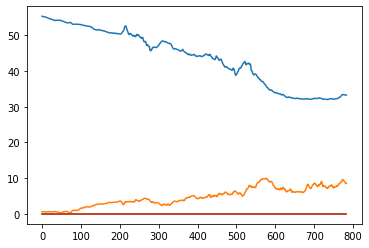

In [ ]:
plt.plot(lW)

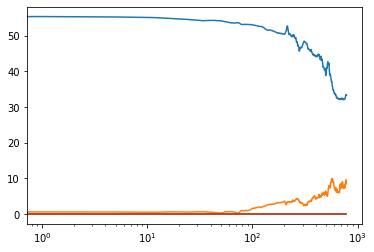

In [ ]:
plt.semilogx(lW)

In [ ]:
print("L: ", L.shape)
print("U: ", lU.shape)
print("W: ", lW.shape)
print("Vt: ", lVt.shape)



L:  (784, 960, 4)
U:  (784, 960, 960)
W:  (784, 4)
Vt:  (784, 4, 4)


In [ ]:
plt.suptitle('Aproximações de posto k', fontsize=16)
fig=plt.figure(figsize=(45, 20))


<Figure size 432x288 with 0 Axes>

<Figure size 3240x1440 with 0 Axes>

In [ ]:
rows = 3
columns =  1

In [ ]:
for i in range(0, rows*columns):
    plot = fig.add_subplot(rows, columns, i+1)
    plot.set_title("Posto %d" % (784-100*i))
    plt.imshow(gen_rank_k(784-100*1, lU, lW, lVt), cmap='gray', interpolation=None)
    ax = plt.axes
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


ValueError: ignored

In [ ]:

fig=plt.figure(figsize=(45, 20))

<Figure size 3240x1440 with 0 Axes>

In [ ]:
plt.suptitle('Aproximações de posto k', fontsize=16)

rows = 3
columns = 1

<Figure size 432x288 with 0 Axes>

In [ ]:
for i in range(1, rows*columns+1):
    plot = fig.add_subplot(rows, columns, i)
    plot.set_title("Posto %d" % (784-100*i))
    plt.imshow(gen_rank_k((784-100*i), lU, lW, lVt), cmap='gray', interpolation=None)
    ax = plt.axes
plt.show()

ValueError: ignored

In [ ]:
fig=plt.figure(figsize=(45, 20))

<Figure size 3240x1440 with 0 Axes>

In [ ]:
plt.suptitle('Aproximações de posto k', fontsize=16)

rows = 3
columns = 1

<Figure size 432x288 with 0 Axes>

In [ ]:

for i in range(1, rows*columns+1):
    plot = fig.add_subplot(rows, columns, i)
    plot.set_title("Posto %d" % (290-90*i))
    plt.imshow(gen_rank_k(290-90*i, lU, lW, lVt), cmap='gray', interpolation=None)
    ax = plt.axes
plt.show()



ValueError: ignored

In [ ]:
#Vetorização de texto



import pandas as pd
import numpy as np
from numpy.linalg import svd
from nltk.stem import RSLPStemmer
import multiprocessing as mp
import matplotlib.pyplot as plt

In [ ]:

df = pd.read_csv("/content/Tweets_Mg.csv") 
df.head(10)

,Unnamed: 0,Created At,Text,Geo Coordinates.latitude,Geo Coordinates.longitude,User Location,Username,User Screen Name,Retweet Count,Classificacao,Observação,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24
0,0,Sun Jan 08 01:22:05 +0000 2017,���⛪ @ Catedral de Santo Antônio - Governador ...,NaN,NaN,Brasil,Leonardo C Schneider,LeoCSchneider,0,Neutro,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Sun Jan 08 01:49:01 +0000 2017,"� @ Governador Valadares, Minas Gerais https:/...",-41.9333,-18.85,NaN,Wândell,klefnews,0,Neutro,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Sun Jan 08 01:01:46 +0000 2017,"�� @ Governador Valadares, Minas Gerais https:...",-41.9333,-18.85,NaN,Wândell,klefnews,0,Neutro,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,Wed Jan 04 21:43:51 +0000 2017,��� https://t.co/BnDsO34qK0,NaN,NaN,NaN,Ana estudando,estudandoconcur,0,Neutro,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,Mon Jan 09 15:08:21 +0000 2017,��� PSOL vai questionar aumento de vereadores ...,NaN,NaN,NaN,Emily,Milly777,0,Negativo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,5,Sat Jan 07 13:47:55 +0000 2017,""" bom é bandido morto""\nDeputado Cabo Júlio é ...",NaN,NaN,Um Outro Mundo É Possível,Maristela Guimarães,florpimenta,0,Neutro,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,6,Wed Jan 04 23:00:53 +0000 2017,"""..E 25% dos mineiros dizem não torcer para ti...",NaN,NaN,NaN,Adriano,almanakfc,0,Neutro,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,7,Sun Jan 08 18:34:22 +0000 2017,"""A gigantesca barba do mal"" em destaque no cad...",NaN,NaN,"Belo Horizonte, Brasil",Editora Nemo,editoranemo,2,Neutro,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,8,Wed Jan 04 22:55:08 +0000 2017,"""BB e governo de Minas travam disputa sobre de...",NaN,NaN,NaN,Minas Previ,MinasPrevi,0,Negativo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,9,Sat Jan 07 01:37:10 +0000 2017,"""com vcs bh fica pequena!"" Belo Horizonte (pro...",NaN,NaN,Belo Horizonte - MG,Marina.,mmarinaey,0,Neutro,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df = df.Text
df.head(10)

0    ���⛪ @ Catedral de Santo Antônio - Governador ...
1    � @ Governador Valadares, Minas Gerais https:/...
2    �� @ Governador Valadares, Minas Gerais https:...
3                          ��� https://t.co/BnDsO34qK0
4    ��� PSOL vai questionar aumento de vereadores ...
5    " bom é bandido morto"\nDeputado Cabo Júlio é ...
6    "..E 25% dos mineiros dizem não torcer para ti...
7    "A gigantesca barba do mal" em destaque no cad...
8    "BB e governo de Minas travam disputa sobre de...
9    "com vcs bh fica pequena!" Belo Horizonte (pro...
Name: Text, dtype: object

In [ ]:
def conta_palavras(texto):
    palavras = texto.split(" ")
    return {x:palavras.count(x) for x in palavras}

#Vamos testar a nossa função.

In [ ]:
conta_palavras(df.values[0])

{'-': 1,
 '@': 1,
 'Antônio': 1,
 'Catedral': 1,
 'Governador': 1,
 'Santo': 1,
 'Valadares/MG': 1,
 'de': 1,
 'https://t.co/JSbKamIqUJ': 1,
 '���⛪': 1}

In [ ]:
stemer = RSLPStemmer()

#Vejamos alguns termos após o processo:

LookupError: ignored

In [ ]:
stemer.stem("Governador")

NameError: ignored

In [ ]:
stemer.stem("Governadora")

In [ ]:
stemer.stem("Governadoras")

NameError: ignored

In [ ]:
stemer.stem("Valadares/MG")

NameError: ignored

In [ ]:
stemer.stem("https://t.co/JSbKamIqUJ")

In [ ]:
stemer.stem("���⛪")

In [ ]:
stemer.stem("@")

In [ ]:
stopwords = pd.read_csv("/content/stopwords.csv")
stopwords.head(10)

,de
0,a
1,o
2,que
3,e
4,do
5,da
6,em
7,um
8,para
9,é


In [ ]:
stopwords = stopwords.values
stopwords[:10]

array([['a'],
       ['o'],
       ['que'],
       ['e'],
       ['do'],
       ['da'],
       ['em'],
       ['um'],
       ['para'],
       ['é']], dtype=object)

In [ ]:
stopwords = [linha[0].strip() for linha in stopwords]
stopwords

['a',
 'o',
 'que',
 'e',
 'do',
 'da',
 'em',
 'um',
 'para',
 'é',
 'com',
 'não',
 'uma',
 'os',
 'no',
 'se',
 'na',
 'por',
 'mais',
 'as',
 'dos',
 'como',
 'mas',
 'foi',
 'ao',
 'ele',
 'das',
 'tem',
 'à',
 'seu',
 'sua',
 'ou',
 'ser',
 'quando',
 'muito',
 'há',
 'nos',
 'já',
 'está',
 'eu',
 'também',
 'só',
 'pelo',
 'pela',
 'até',
 'isso',
 'ela',
 'entre',
 'era',
 'depois',
 'sem',
 'mesmo',
 'aos',
 'ter',
 'seus',
 'quem',
 'nas',
 'me',
 'esse',
 'eles',
 'estão',
 'você',
 'tinha',
 'foram',
 'essa',
 'num',
 'nem',
 'suas',
 'meu',
 'às',
 'minha',
 'têm',
 'numa',
 'pelos',
 'elas',
 'havia',
 'seja',
 'qual',
 'será',
 'nós',
 'tenho',
 'lhe',
 'deles',
 'essas',
 'esses',
 'pelas',
 'este',
 'fosse',
 'dele',
 'tu',
 'te',
 'vocês',
 'vos',
 'lhes',
 'meus',
 'minhas',
 'teu',
 'tua',
 'teus',
 'tuas',
 'nosso',
 'nossa',
 'nossos',
 'nossas',
 'dela',
 'delas',
 'esta',
 'estes',
 'estas',
 'aquele',
 'aquela',
 'aqueles',
 'aquelas',
 'isto',
 'aquilo',
 'es

In [ ]:
def conta_palavras(texto, stopwords=stopwords):
    palavras = texto.split(" ")
    palavras = [palavra for palavra in palavras if palavra not in stopwords]
    return {x:palavras.count(x) for x in palavras}

In [ ]:
conta_palavras(df.values[0])

{'-': 1,
 '@': 1,
 'Antônio': 1,
 'Catedral': 1,
 'Governador': 1,
 'Santo': 1,
 'Valadares/MG': 1,
 'de': 1,
 'https://t.co/JSbKamIqUJ': 1,
 '���⛪': 1}

In [ ]:
def conta_palavras(texto, stopwords=stopwords):
    palavras = texto.split(" ")
    palavras = [palavra for palavra in palavras if palavra not in stopwords and palavra.isalpha()]
    return {x:palavras.count(x) for x in palavras}

In [ ]:
conta_palavras(df.values[0])

{'Antônio': 1, 'Catedral': 1, 'Governador': 1, 'Santo': 1, 'de': 1}

In [ ]:
def conta_palavras(texto, stopwords=stopwords, stemer=stemer):
    palavras = texto.split(" ")
    palavras = [stemer.stem(palavra) for palavra in palavras if palavra not in stopwords and palavra.isalpha()]
    return {x:palavras.count(x) for x in palavras}

NameError: ignored

In [ ]:
conta_palavras(df.values[0])

{'Antônio': 1, 'Catedral': 1, 'Governador': 1, 'Santo': 1, 'de': 1}

In [ ]:
with mp.Pool() as p:
    contagem = p.map(conta_palavras, df.values)

In [ ]:
contagem

[{'Antônio': 1, 'Catedral': 1, 'Governador': 1, 'Santo': 1, 'de': 1},
 {'Gerais': 1, 'Governador': 1, 'Minas': 1},
 {'Gerais': 1, 'Governador': 1, 'Minas': 1},
 {},
 {'BH': 1,
  'Estado': 1,
  'Justiça': 1,
  'Minas': 1,
  'PSOL': 1,
  'Politica': 1,
  'aumento': 1,
  'de': 3,
  'prefeito': 1,
  'questionar': 1,
  'vai': 1,
  'vereadores': 1},
 {'Cabo': 1,
  'Estado': 1,
  'Júlio': 1,
  'Minas': 1,
  'Politica': 1,
  'anos': 1,
  'bandido': 1,
  'bom': 1,
  'condenado': 1,
  'de': 1,
  'fica': 1,
  'inelegível': 1},
 {'de': 1,
  'dentro': 1,
  'dizem': 1,
  'estado': 1,
  'mineiros': 1,
  'time': 1,
  'torcer': 1},
 {'Cultura': 1,
  'Estado': 1,
  'barba': 1,
  'caderno': 1,
  'de': 1,
  'destaque': 1,
  'gigantesca': 1},
 {'Minas': 1,
  'de': 1,
  'depósitos': 1,
  'disputa': 1,
  'governo': 1,
  'sobre': 1,
  'travam': 1},
 {'Belo': 1,
  'Horizonte': 1,
  'aproximadamente': 1,
  'bh': 1,
  'capital': 1,
  'de': 2,
  'estado': 1,
  'fica': 1,
  'vcs': 1,
  'área': 1},
 {'NÃO': 1,
  'e

In [ ]:
termo_documento_transposto = pd.DataFrame(contagem)
termo_documento_transposto.head(10)

,Catedral,de,Santo,Antônio,Governador,Minas,Gerais,PSOL,vai,questionar,aumento,vereadores,prefeito,BH,Justiça,Politica,Estado,bom,bandido,Cabo,Júlio,condenado,fica,inelegível,anos,mineiros,dizem,torcer,time,dentro,estado,gigantesca,barba,destaque,caderno,Cultura,governo,travam,disputa,sobre,...,confessou,negociou,Casal,Cuiabá,mesma,centro,trazido,matado,médica,tropas,Gangue,dispensa,perseguição,vítimas,invade,JEQUITINHONHA,Líderes,transferidos,aproveitar,pqp,kk,Perigoso,atitude,sequestro,bairros,criminoso,testemunha,Olegário,vadiagem,Santana,Esmeraldas,acusado,Tribuna,Mateus,Leme,Assista,responsáveis,OBSERVATÓRIO,Paracatu,molestado
0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,3.0,NaN,NaN,NaN,1.0,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
termo_documento_transposto = termo_documento_transposto.fillna(0)
termo_documento_transposto.head(100)

,Catedral,de,Santo,Antônio,Governador,Minas,Gerais,PSOL,vai,questionar,aumento,vereadores,prefeito,BH,Justiça,Politica,Estado,bom,bandido,Cabo,Júlio,condenado,fica,inelegível,anos,mineiros,dizem,torcer,time,dentro,estado,gigantesca,barba,destaque,caderno,Cultura,governo,travam,disputa,sobre,...,confessou,negociou,Casal,Cuiabá,mesma,centro,trazido,matado,médica,tropas,Gangue,dispensa,perseguição,vítimas,invade,JEQUITINHONHA,Líderes,transferidos,aproveitar,pqp,kk,Perigoso,atitude,sequestro,bairros,criminoso,testemunha,Olegário,vadiagem,Santana,Esmeraldas,acusado,Tribuna,Mateus,Leme,Assista,responsáveis,OBSERVATÓRIO,Paracatu,molestado
0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,3.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
96,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
97,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
98,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


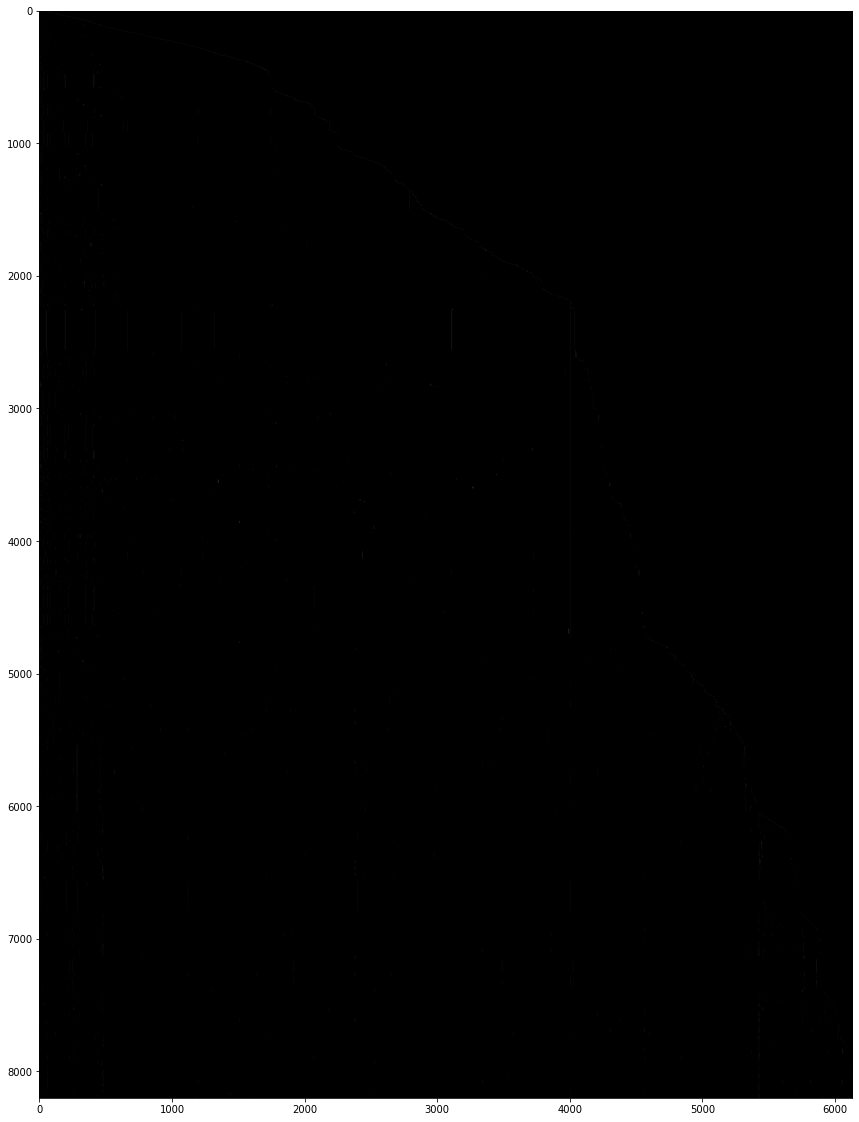

In [ ]:
plt.figure(figsize=(20, 20))
plt.imshow(termo_documento_transposto, cmap='gray')

In [ ]:
termo_documento = termo_documento_transposto.T
termo_documento.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,8159,8160,8161,8162,8163,8164,8165,8166,8167,8168,8169,8170,8171,8172,8173,8174,8175,8176,8177,8178,8179,8180,8181,8182,8183,8184,8185,8186,8187,8188,8189,8190,8191,8192,8193,8194,8195,8196,8197,8198
Catedral,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
de,1.0,0.0,0.0,0.0,3.0,1.0,1.0,1.0,1.0,2.0,0.0,0.0,2.0,2.0,2.0,0.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,3.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,...,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0
Santo,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Antônio,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Governador,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Minas,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,2.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Gerais,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
PSOL,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
vai,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
questionar,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
U, W, Vt = svd(termo_documento.values, full_matrices=True)

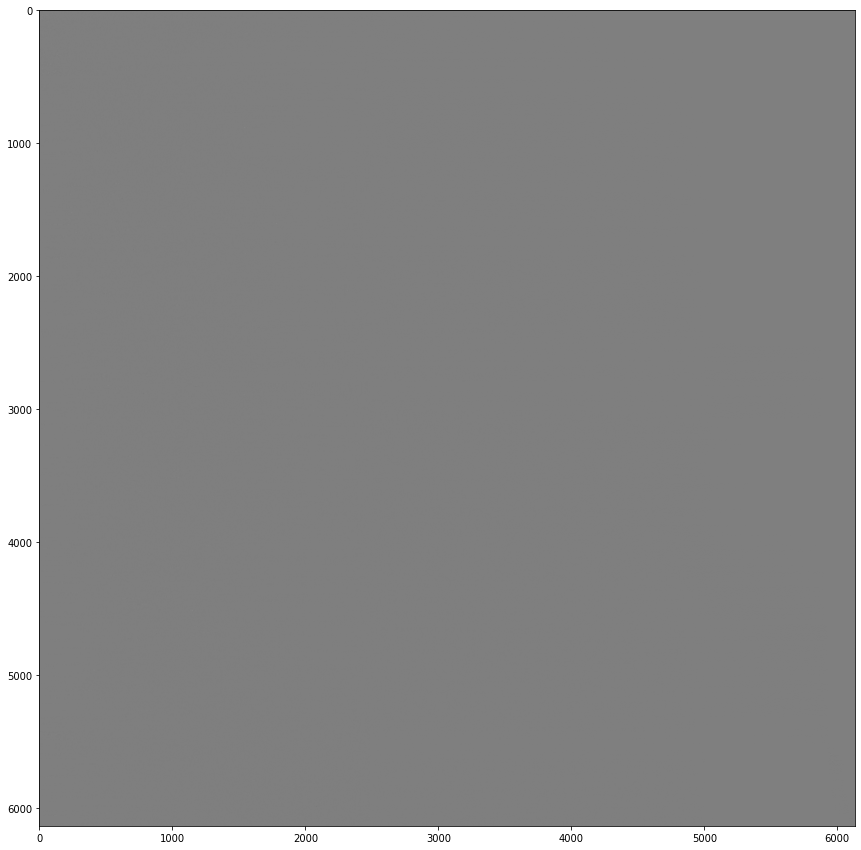

In [ ]:
plt.figure(figsize=(15, 15))
plt.imshow(U, cmap='gray')

In [ ]:
U

array([[ 4.87242733e-05, -5.08972968e-05,  1.89579108e-05, ...,
        -7.22614105e-03,  4.59376316e-02,  3.47296102e-02],
       [ 8.88312364e-01, -2.46815867e-01,  8.15424294e-02, ...,
         1.56125113e-17, -8.67361738e-17, -3.46944695e-18],
       [ 8.49530998e-05, -2.39833857e-05,  4.22027435e-05, ...,
         8.45127704e-04, -1.06716135e-02, -7.93654848e-03],
       ...,
       [ 1.22360129e-04,  6.90823294e-05,  1.67860270e-05, ...,
         3.59458948e-03,  5.24860730e-03,  1.80500972e-03],
       [ 6.11800647e-05,  3.45411647e-05,  8.39301351e-06, ...,
        -2.29417488e-02, -5.68060068e-03, -1.14955203e-02],
       [ 5.31563434e-05, -7.11607354e-05,  2.66678854e-05, ...,
         1.05825641e-02, -3.40975104e-02, -1.69809600e-02]])

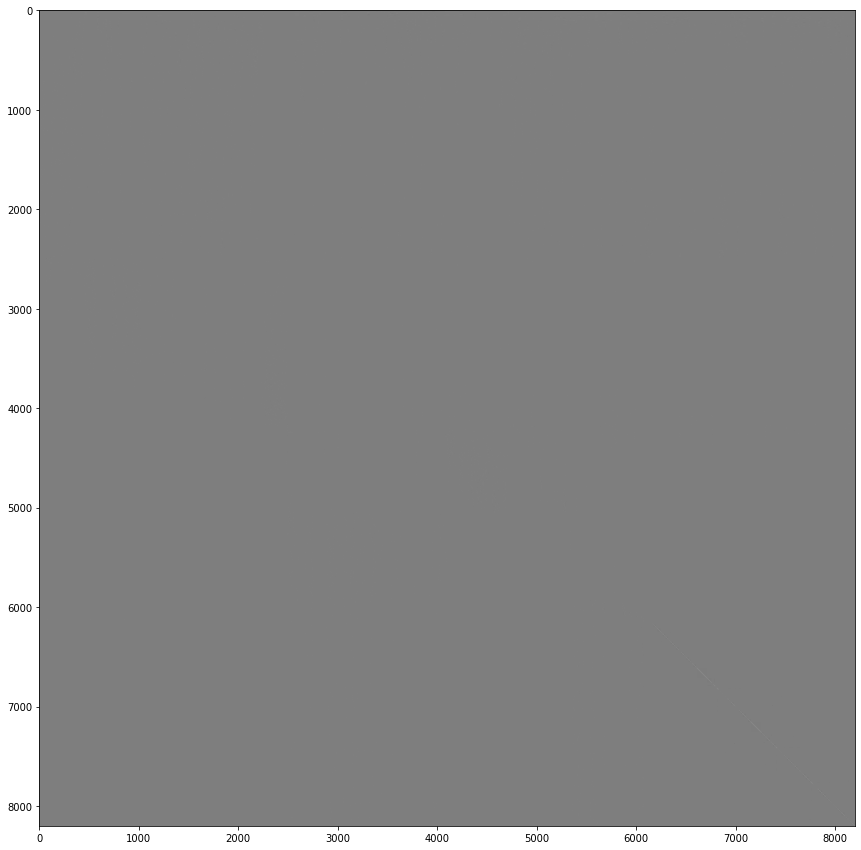

In [ ]:
plt.figure(figsize=(15, 15))
plt.imshow(Vt, cmap='gray')

In [ ]:
Vt

array([[ 6.61931795e-03,  2.10779223e-03,  2.10779223e-03, ...,
         7.24873017e-03,  7.22142609e-03,  1.36862335e-02],
       [-3.55455105e-03, -2.34939286e-03, -2.34939286e-03, ...,
        -5.02645840e-03, -4.96970336e-03, -8.37721165e-03],
       [ 1.21282450e-03,  1.22610533e-03,  1.22610533e-03, ...,
         1.79838457e-03,  1.70606693e-03,  2.99153746e-03],
       ...,
       [ 0.00000000e+00, -9.23131627e-07, -4.20991852e-06, ...,
         9.11044864e-05, -2.49472379e-18,  2.07930694e-05],
       [ 0.00000000e+00,  3.17602565e-06, -1.63012728e-05, ...,
        -5.18351679e-05, -5.53853668e-19, -2.55433482e-05],
       [ 0.00000000e+00,  4.83382953e-06, -1.88141534e-05, ...,
         6.96590920e-05, -2.87906499e-18,  2.27823752e-05]])

In [ ]:
indice_amostra = [12, 53, 8, 8188, 8169, 8198, 9, 13, 14]
amostra = df[indice_amostra]
for indice, documento in amostra.iteritems():
    print(indice, "\n", documento, "\n", "-"*50, "\n")

12 
 "erro desconhecido" é mato! Aliás, é da secretaria estadual de fazenda que tá assim... MG não precisa de dinheiro não, Governador? 
 -------------------------------------------------- 

53 
 #beta #betalab #mg Pedido ao STF irritou Meirelles: Governo ameaça suspender aval para… https://t.co/cHJbFIKAOY… https://t.co/uSTdKS5mCn 
 -------------------------------------------------- 

8 
 "BB e governo de Minas travam disputa sobre depósitos judiciais" https://t.co/CnMu2A2Qo5 
 -------------------------------------------------- 

8188 
 Trio é preso suspeito de roubo, tráfico e abuso sexual em Uberlândia https://t.co/rbjjdz2eFu 
 -------------------------------------------------- 

8169 
 Três homens são presos por suspeita de roubo de cargas em Santa Luzia https://t.co/kWWTDR8IJ4 
 -------------------------------------------------- 

8198 
 Trio suspeito de roubo de cargas é preso em Santa Luzia (MG) https://t.co/0INgJcMtZb #R7MG #RecordTVMinas 
 --------------------------------------

In [ ]:
V = np.transpose(Vt)
V

array([[ 6.61931795e-03, -3.55455105e-03,  1.21282450e-03, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 2.10779223e-03, -2.34939286e-03,  1.22610533e-03, ...,
        -9.23131627e-07,  3.17602565e-06,  4.83382953e-06],
       [ 2.10779223e-03, -2.34939286e-03,  1.22610533e-03, ...,
        -4.20991852e-06, -1.63012728e-05, -1.88141534e-05],
       ...,
       [ 7.24873017e-03, -5.02645840e-03,  1.79838457e-03, ...,
         9.11044864e-05, -5.18351679e-05,  6.96590920e-05],
       [ 7.22142609e-03, -4.96970336e-03,  1.70606693e-03, ...,
        -2.49472379e-18, -5.53853668e-19, -2.87906499e-18],
       [ 1.36862335e-02, -8.37721165e-03,  2.99153746e-03, ...,
         2.07930694e-05, -2.55433482e-05,  2.27823752e-05]])

In [ ]:
V_amostra = V[indice_amostra]
V_amostra

array([[ 1.41538940e-02, -3.79403865e-03, -3.45814836e-03, ...,
        -8.76937015e-18, -4.74608442e-18,  7.02105610e-18],
       [ 3.40933748e-04, -1.86016708e-04, -1.08676086e-04, ...,
        -1.02904974e-17,  1.25712924e-18, -4.81350295e-18],
       [ 8.98771489e-03, -2.56168847e-03, -2.64807357e-03, ...,
        -6.58076421e-07,  4.98607204e-06,  2.95573695e-05],
       ...,
       [ 1.35282085e-02, -7.24520061e-03,  2.73820462e-03, ...,
         5.79137436e-18, -8.41433927e-18,  3.74272096e-18],
       [ 1.56438177e-02, -1.09923802e-02,  4.66105423e-03, ...,
        -2.72008540e-06,  7.26618226e-06,  1.96999087e-05],
       [ 1.56438177e-02, -1.09923802e-02,  4.66105423e-03, ...,
         5.24298961e-06,  6.05792422e-08, -9.11419267e-06]])

In [ ]:
V_amostra2 = V_amostra[:,:2]
V_amostra2

array([[ 0.01415389, -0.00379404],
       [ 0.00034093, -0.00018602],
       [ 0.00898771, -0.00256169],
       [ 0.00724873, -0.00502646],
       [ 0.01365495, -0.00824525],
       [ 0.01368623, -0.00837721],
       [ 0.01352821, -0.0072452 ],
       [ 0.01564382, -0.01099238],
       [ 0.01564382, -0.01099238]])

In [ ]:
V_amostra2 = np.asarray([v/np.linalg.norm(v) for v in V_amostra2])
V_amostra2

array([[ 0.96589999, -0.25891545],
       [ 0.87783837, -0.47895699],
       [ 0.96169984, -0.27410476],
       [ 0.82176185, -0.56983108],
       [ 0.85604365, -0.51690355],
       [ 0.85290999, -0.52205799],
       [ 0.88153568, -0.47211741],
       [ 0.81820579, -0.57492546],
       [ 0.81820579, -0.57492546]])

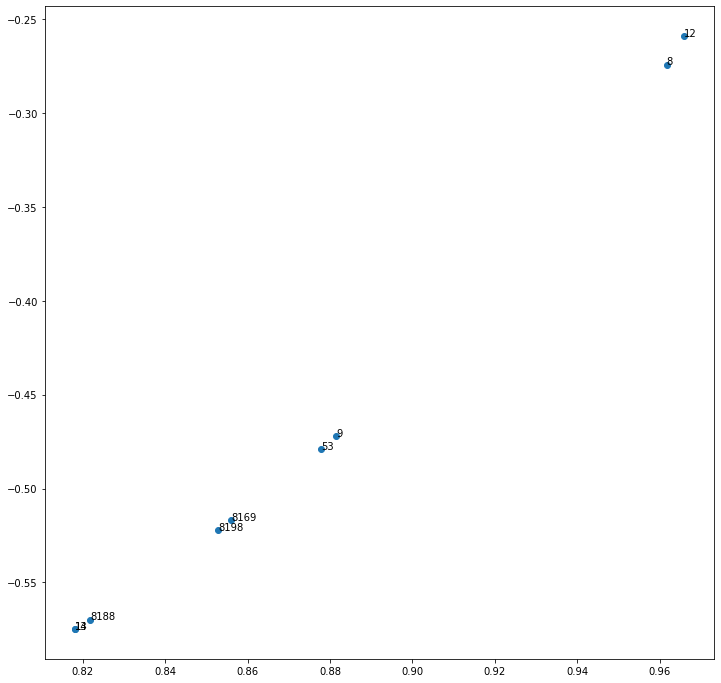

In [ ]:
plt.figure(figsize=(12, 12))

x = V_amostra2[:, 0]
y = V_amostra2[:, 1]

plt.scatter(x, y)

for i, indice in enumerate(indice_amostra):
    plt.annotate(indice, (x[i], y[i]))

In [ ]:
df[12]

'"erro desconhecido" é mato! Aliás, é da secretaria estadual de fazenda que tá assim... MG não precisa de dinheiro não, Governador?'

In [ ]:
df[53]

'#beta #betalab #mg Pedido ao STF irritou Meirelles: Governo ameaça suspender aval para… https://t.co/cHJbFIKAOY… https://t.co/uSTdKS5mCn'

In [ ]:
df[8]

'"BB e governo de Minas travam disputa sobre depósitos judiciais" https://t.co/CnMu2A2Qo5'

In [ ]:
df[8188]

'Trio é preso suspeito de roubo, tráfico e abuso sexual em Uberlândia https://t.co/rbjjdz2eFu'

In [ ]:
df[8169]

'Três homens são presos por suspeita de roubo de cargas em Santa Luzia https://t.co/kWWTDR8IJ4'

In [ ]:
df[9]

'"com vcs bh fica pequena!" Belo Horizonte (pron. [bɛloɾiˈzõntʃi][10]) é a capital do estado de MG, com uma área de aproximadamente 331 km²'

In [ ]:
df[13]

'"La La Land: Cantando Estações" arrasa no Globo de Ouro - Estado de Minas https://t.co/aQ0NG1bp5f https://t.co/aY3qlrVnTE'

In [ ]:
df[14]

'"La La Land: Cantando Estações" arrasa no Globo de Ouro - Estado de Minas https://t.co/qRI9DCiicc'

In [ ]:
import pandas as pd
import numpy as np
from numpy.linalg import svd
from nltk.stem import RSLPStemmer
import multiprocessing as mp
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import ColumnDataSource, Range1d, LabelSet, Label
from bokeh import palettes
from sklearn.cluster import KMeans



In [ ]:
output_notebook()

In [ ]:
df1 = pd.read_csv("/content/titulos-buzzfeed-brasil-non_clickbait_titles.csv")
df1['grupo'] = 'noticia'
df1.head(10)

,Unnamed: 0,timestamp,title,url,grupo
0,0,2018-05-22 21:02:43,Nem todos que assinam manifesto pró-Boulos dec...,https://www.buzzfeed.com/tatianafarah/frei-bet...,noticia
1,1,2018-05-22 18:47:46,Centenas de professores universitários não est...,https://www.buzzfeed.com/felitti/centenas-de-p...,noticia
2,2,2018-05-22 14:35:14,Janaina Paschoal diz que ser vice de Bolsonaro...,https://www.buzzfeed.com/tatianafarah/janaina-...,noticia
3,3,2018-05-21 20:58:21,Russomanno vira sócio de startup financeira qu...,https://www.buzzfeed.com/alexandrearagao/russo...,noticia
4,4,2018-05-21 20:21:21,"Governo errou na política para combustíveis, d...",https://www.buzzfeed.com/severinomotta/governo...,noticia
5,5,2018-05-21 17:17:36,"Pessoas trans fazem fila em mutirão para, fina...",https://www.buzzfeed.com/tatianafarah/pessoas-...,noticia
6,6,2018-05-18 19:26:43,"Facebook condena ""ataques"" a parceiros no Bras...",https://www.buzzfeed.com/mauroalbano/facebook-...,noticia
7,7,2018-05-18 19:24:13,"Desta vez, José Dirceu deve ficar no mínimo 8 ...",https://www.buzzfeed.com/tatianafarah/desta-ve...,noticia
8,8,2018-05-18 16:48:30,PF promete concluir investigação contra Temer ...,https://www.buzzfeed.com/severinomotta/pf-prom...,noticia
9,9,2018-05-18 15:31:40,Atirador abre fogo em escola no Texas e deixa ...,https://www.buzzfeed.com/maryanngeorgantopoulo...,noticia


In [ ]:

df2 = pd.read_csv("/content/titulos-buzzfeed-brasil-non_clickbait_titles.csv")
df2['grupo'] = 'caça-clique'
df2.head(10)

,Unnamed: 0,timestamp,title,url,grupo
0,0,2018-05-22 21:02:43,Nem todos que assinam manifesto pró-Boulos dec...,https://www.buzzfeed.com/tatianafarah/frei-bet...,caça-clique
1,1,2018-05-22 18:47:46,Centenas de professores universitários não est...,https://www.buzzfeed.com/felitti/centenas-de-p...,caça-clique
2,2,2018-05-22 14:35:14,Janaina Paschoal diz que ser vice de Bolsonaro...,https://www.buzzfeed.com/tatianafarah/janaina-...,caça-clique
3,3,2018-05-21 20:58:21,Russomanno vira sócio de startup financeira qu...,https://www.buzzfeed.com/alexandrearagao/russo...,caça-clique
4,4,2018-05-21 20:21:21,"Governo errou na política para combustíveis, d...",https://www.buzzfeed.com/severinomotta/governo...,caça-clique
5,5,2018-05-21 17:17:36,"Pessoas trans fazem fila em mutirão para, fina...",https://www.buzzfeed.com/tatianafarah/pessoas-...,caça-clique
6,6,2018-05-18 19:26:43,"Facebook condena ""ataques"" a parceiros no Bras...",https://www.buzzfeed.com/mauroalbano/facebook-...,caça-clique
7,7,2018-05-18 19:24:13,"Desta vez, José Dirceu deve ficar no mínimo 8 ...",https://www.buzzfeed.com/tatianafarah/desta-ve...,caça-clique
8,8,2018-05-18 16:48:30,PF promete concluir investigação contra Temer ...,https://www.buzzfeed.com/severinomotta/pf-prom...,caça-clique
9,9,2018-05-18 15:31:40,Atirador abre fogo em escola no Texas e deixa ...,https://www.buzzfeed.com/maryanngeorgantopoulo...,caça-clique


In [ ]:
df = pd.concat([df1, df2])

In [ ]:
df.head(10)

,Unnamed: 0,timestamp,title,url,grupo
0,0,2018-05-22 21:02:43,Nem todos que assinam manifesto pró-Boulos dec...,https://www.buzzfeed.com/tatianafarah/frei-bet...,noticia
1,1,2018-05-22 18:47:46,Centenas de professores universitários não est...,https://www.buzzfeed.com/felitti/centenas-de-p...,noticia
2,2,2018-05-22 14:35:14,Janaina Paschoal diz que ser vice de Bolsonaro...,https://www.buzzfeed.com/tatianafarah/janaina-...,noticia
3,3,2018-05-21 20:58:21,Russomanno vira sócio de startup financeira qu...,https://www.buzzfeed.com/alexandrearagao/russo...,noticia
4,4,2018-05-21 20:21:21,"Governo errou na política para combustíveis, d...",https://www.buzzfeed.com/severinomotta/governo...,noticia
5,5,2018-05-21 17:17:36,"Pessoas trans fazem fila em mutirão para, fina...",https://www.buzzfeed.com/tatianafarah/pessoas-...,noticia
6,6,2018-05-18 19:26:43,"Facebook condena ""ataques"" a parceiros no Bras...",https://www.buzzfeed.com/mauroalbano/facebook-...,noticia
7,7,2018-05-18 19:24:13,"Desta vez, José Dirceu deve ficar no mínimo 8 ...",https://www.buzzfeed.com/tatianafarah/desta-ve...,noticia
8,8,2018-05-18 16:48:30,PF promete concluir investigação contra Temer ...,https://www.buzzfeed.com/severinomotta/pf-prom...,noticia
9,9,2018-05-18 15:31:40,Atirador abre fogo em escola no Texas e deixa ...,https://www.buzzfeed.com/maryanngeorgantopoulo...,noticia


In [ ]:
df = df.sample(frac=1)
df.head(10)

,Unnamed: 0,timestamp,title,url,grupo
96,96,2018-04-05 21:10:19,Aqui está a íntegra do mandado de prisão que M...,https://www.buzzfeed.com/alexandrearagao/aqui-...,caça-clique
485,485,2017-11-07 14:43:27,Manifestantes põem fogo em boneca de filósofa ...,https://www.buzzfeed.com/alexandrearagao/manif...,noticia
233,233,2018-02-06 20:06:52,"Tirando o Lula, não há nenhuma candidatura con...",https://www.buzzfeed.com/tatianafarah/tirando-...,noticia
1000,1000,2017-05-04 13:46:57,"Para evitar nova derrota, Fachin mandou caso d...",https://www.buzzfeed.com/severinomotta/para-ev...,noticia
509,509,2017-10-27 13:34:12,Entenda cada indireta no bate-boca entre Gilma...,https://www.buzzfeed.com/alexandrearagao/briga...,noticia
397,397,2017-11-30 18:19:31,Justiça nega indenização a Romário por reporta...,https://www.buzzfeed.com/alexandrearagao/inden...,caça-clique
193,193,2018-02-23 15:33:45,Escritório de advogados de Lula é citado em pa...,https://www.buzzfeed.com/filipecoutinho/escrit...,caça-clique
514,514,2017-10-26 13:50:31,PF faz operação contra assessores de ex-minist...,https://www.buzzfeed.com/filipecoutinho/pf-faz...,noticia
885,885,2017-06-12 21:55:44,Um artista sírio pintou líderes mundiais como ...,https://www.buzzfeed.com/anupkaphle/artista-si...,caça-clique
681,681,2017-09-05 14:52:06,Esta é a montanha de dinheiro que Geddel estav...,https://www.buzzfeed.com/alexandrearagao/dinhe...,noticia


In [ ]:
df = df.reset_index(drop=True)
df.head(10)

,Unnamed: 0,timestamp,title,url,grupo
0,96,2018-04-05 21:10:19,Aqui está a íntegra do mandado de prisão que M...,https://www.buzzfeed.com/alexandrearagao/aqui-...,caça-clique
1,485,2017-11-07 14:43:27,Manifestantes põem fogo em boneca de filósofa ...,https://www.buzzfeed.com/alexandrearagao/manif...,noticia
2,233,2018-02-06 20:06:52,"Tirando o Lula, não há nenhuma candidatura con...",https://www.buzzfeed.com/tatianafarah/tirando-...,noticia
3,1000,2017-05-04 13:46:57,"Para evitar nova derrota, Fachin mandou caso d...",https://www.buzzfeed.com/severinomotta/para-ev...,noticia
4,509,2017-10-27 13:34:12,Entenda cada indireta no bate-boca entre Gilma...,https://www.buzzfeed.com/alexandrearagao/briga...,noticia
5,397,2017-11-30 18:19:31,Justiça nega indenização a Romário por reporta...,https://www.buzzfeed.com/alexandrearagao/inden...,caça-clique
6,193,2018-02-23 15:33:45,Escritório de advogados de Lula é citado em pa...,https://www.buzzfeed.com/filipecoutinho/escrit...,caça-clique
7,514,2017-10-26 13:50:31,PF faz operação contra assessores de ex-minist...,https://www.buzzfeed.com/filipecoutinho/pf-faz...,noticia
8,885,2017-06-12 21:55:44,Um artista sírio pintou líderes mundiais como ...,https://www.buzzfeed.com/anupkaphle/artista-si...,caça-clique
9,681,2017-09-05 14:52:06,Esta é a montanha de dinheiro que Geddel estav...,https://www.buzzfeed.com/alexandrearagao/dinhe...,noticia


In [ ]:
grupos = df['grupo']
df = df["title"]
df.head(10)

0    Aqui está a íntegra do mandado de prisão que M...
1    Manifestantes põem fogo em boneca de filósofa ...
2    Tirando o Lula, não há nenhuma candidatura con...
3    Para evitar nova derrota, Fachin mandou caso d...
4    Entenda cada indireta no bate-boca entre Gilma...
5    Justiça nega indenização a Romário por reporta...
6    Escritório de advogados de Lula é citado em pa...
7    PF faz operação contra assessores de ex-minist...
8    Um artista sírio pintou líderes mundiais como ...
9    Esta é a montanha de dinheiro que Geddel estav...
Name: title, dtype: object

In [ ]:
grupos.head(10)

0    caça-clique
1        noticia
2        noticia
3        noticia
4        noticia
5    caça-clique
6    caça-clique
7        noticia
8    caça-clique
9        noticia
Name: grupo, dtype: object

In [ ]:
stopwords = pd.read_csv("/content/stopwords.csv").values

In [ ]:
def conta_palavras(texto, stopwords=stopwords, stemer=stemer):
    palavras = texto.split(" ")
    palavras = [palavra.lower() for palavra in palavras if palavra not in stopwords and palavra.isalpha()]
    return {x:palavras.count(x) for x in palavras}

NameError: ignored

In [ ]:
with mp.Pool() as p:
    contagem = p.map(conta_palavras, df.values)

In [ ]:
contagem[:5]

[{'Aqui': 1,
  'Lula': 1,
  'Moro': 1,
  'contra': 1,
  'de': 1,
  'expediu': 1,
  'mandado': 1,
  'prisão': 1,
  'íntegra': 1},
 {'Manifestantes': 1,
  'boneca': 1,
  'de': 2,
  'filósofa': 1,
  'fogo': 1,
  'gritos': 1,
  'põem': 1},
 {'Maia': 1,
  'Rodrigo': 1,
  'Tirando': 1,
  'candidatura': 1,
  'diz': 1,
  'nenhuma': 1},
 {'Fachin': 1,
  'Palocci': 1,
  'Para': 1,
  'STF': 1,
  'caso': 1,
  'de': 1,
  'evitar': 1,
  'mandou': 1,
  'nova': 1,
  'plenário': 1},
 {'Barroso': 1, 'Entenda': 1, 'Gilmar': 1, 'cada': 1, 'indireta': 1}]

In [ ]:
termo_documento_transposto = pd.ataFrame(contagem)
termo_documento_transposto.head(10)

AttributeError: ignored

In [ ]:
termo_documento_transposto = termo_documento_transposto.fillna(0)
termo_documento_transposto.head(10)

,Catedral,de,Santo,Antônio,Governador,Minas,Gerais,PSOL,vai,questionar,aumento,vereadores,prefeito,BH,Justiça,Politica,Estado,bom,bandido,Cabo,Júlio,condenado,fica,inelegível,anos,mineiros,dizem,torcer,time,dentro,estado,gigantesca,barba,destaque,caderno,Cultura,governo,travam,disputa,sobre,...,confessou,negociou,Casal,Cuiabá,mesma,centro,trazido,matado,médica,tropas,Gangue,dispensa,perseguição,vítimas,invade,JEQUITINHONHA,Líderes,transferidos,aproveitar,pqp,kk,Perigoso,atitude,sequestro,bairros,criminoso,testemunha,Olegário,vadiagem,Santana,Esmeraldas,acusado,Tribuna,Mateus,Leme,Assista,responsáveis,OBSERVATÓRIO,Paracatu,molestado
0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,3.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
p = figure(x_range=(0, 1), y_range=(0, 1))
p.image(image=[termo_documento_transposto.values], x=0, y=0, dw=1, dh=1, palette="Spectral11")
show(p)

In [ ]:
termo_documento = termo_documento_transposto.T
termo_documento.head(15)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,8159,8160,8161,8162,8163,8164,8165,8166,8167,8168,8169,8170,8171,8172,8173,8174,8175,8176,8177,8178,8179,8180,8181,8182,8183,8184,8185,8186,8187,8188,8189,8190,8191,8192,8193,8194,8195,8196,8197,8198
Catedral,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
de,1.0,0.0,0.0,0.0,3.0,1.0,1.0,1.0,1.0,2.0,0.0,0.0,2.0,2.0,2.0,0.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,3.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,...,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0
Santo,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Antônio,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Governador,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Minas,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,2.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Gerais,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
PSOL,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
vai,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
questionar,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
U, W, Vt = svd(termo_documento.values, full_matrices=True)

In [ ]:
p = figure(x_range=(0, 1), y_range=(0, 1))
p.image(image=[Vt], x=0, y=0, dw=1, dh=1, palette="Spectral11")
show(p)

In [ ]:
U

In [ ]:
palavras = termo_documento_transposto.columns
palavras[:20]

In [ ]:
modelo = KMeans(n_clusters=3)
resultados = modelo.fit_predict(U)

In [ ]:
palavras_resultados = [{p: r} for p, r in zip(palavras, resultados)]

In [ ]:
from functools import reduce

resultado_para = reduce(lambda u,v: {**u, **v}, palavras_resultados)

In [ ]:
print(resultado_para['filha'], resultado_para['mãe'])

In [ ]:
print(resultado_para['afetado'], resultado_para['afetar'])

In [ ]:
print(resultado_para['abraçar'], resultado_para['abraçados'])